In [ ]:
# import libraries 
import numpy as np 
import pandas as pd 
from textblob import TextBlob
import matplotlib.pyplot as plt
from google.colab import files
import keras
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Activation,Embedding,Bidirectional

In [ ]:
# Install Kaggle library
!pip install -q kaggle
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alaix14/bitcoin-tweets-20160101-to-20190329


100% 1.58G/1.58G [00:16<00:00, 147MB/s]
100% 1.58G/1.58G [00:16<00:00, 105MB/s]


In [ ]:

!kaggle datasets download -d columbine/imdb-dataset-sentiment-analysis-in-csv-format

 78% 20.0M/25.7M [00:00<00:00, 32.8MB/s]
100% 25.7M/25.7M [00:00<00:00, 72.1MB/s]


In [ ]:

from zipfile import ZipFile

file_name = "bitcoin-tweets-20160101-to-20190329.zip"

with ZipFile(file_name, "r") as zip:
  zip.extractall()
  print("done")

file_name1 = "imdb-dataset-sentiment-analysis-in-csv-format.zip"

with ZipFile(file_name1, "r") as zip:
  zip.extractall()
  print("done")

done
done


In [ ]:
import pandas as pd 
df = pd.read_csv('tweets.csv', sep=';',nrows=1000000) 
df_imdb = pd.read_csv('Train.csv') 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#predit the language to filter for English 
!pip install whatthelang
from whatthelang import WhatTheLang

wtl = WhatTheLang()
L=[]
for row in df['text']:
    if len(str(row))!=0:
        try:  
          L.append(wtl.predict_lang(row))
        except:
          L.append(None)
    else:
        L.append(None)
        
df['lang'] = L
df.head()
df = df[df["lang"] == 'en']

Lm=[]
for row in df_imdb['text']:
    if len(row)!=0:
        Lm.append(wtl.predict_lang(row))
    else:
        Lm.append(None)
        
df_imdb['lang'] = Lm

df_imdb = df_imdb[df_imdb["lang"] == 'en']
df_imdb.head()

     |████████████████████████████████| 788kB 5.3MB/s 
     |████████████████████████████████| 460kB 11.7MB/s 
     |████████████████████████████████| 245kB 20.2MB/s 
  Created wheel for whatthelang: filename=whatthelang-1.0.1-cp37-none-any.whl size=789821 sha256=9c320cf167b1b3cfe544e519b104e846575451b99626f5243612099103e2dd34
  Stored in directory: /root/.cache/pip/wheels/54/ec/de/379ea04fcc427c46fe3ecd21a5041875fcb41bbd81062abba5
  Created wheel for cysignals: filename=cysignals-1.10.3-cp37-cp37m-linux_x86_64.whl size=706061 sha256=423922463e001d20ccb5353b0abd6b13500e5cadddad7956a283399363dd884f
  Stored in directory: /root/.cache/pip/wheels/1d/de/c9/22c3a5adc6ff0dd19904d4cab0677410e53f4fdd42188ae123
  Created wheel for pyfasttext: filename=pyfasttext-0.4.6-cp37-cp37m-linux_x86_64.whl size=1461032 sha256=c330dc2a67d8521c51d8efde1f0b3a2bca3d7cbd50dfd01ed8c0910ec8a8c32a
  Stored in directory: /root/.cache/pip/wheels/25/de/c6/3d26a304c069689a7bf5ef2cc774588663700c8381dbf3d947
Successful

,text,label,lang
0,I grew up (b. 1965) watching and loving the Th...,0,en
1,"When I put this movie in my DVD player, and sa...",0,en
2,Why do people who do not know what a particula...,0,en
3,Even though I have great interest in Biblical ...,0,en
4,Im a die hard Dads Army fan and nothing will e...,1,en


In [ ]:
#upload files for Bitcoin trading

uploaded = files.upload()

Saving BTC_USD_2013-10-01_2021-07-02-CoinDesk.csv to BTC_USD_2013-10-01_2021-07-02-CoinDesk.csv


In [ ]:
df_btc = pd.read_csv("BTC_USD_2013-10-01_2021-07-02-CoinDesk.csv")
df_btc.head() 

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [ ]:
# convert date to format
df_btc["Date_Time"]=pd.to_datetime(df_btc["Date"], format='%Y%m%d', errors='ignore')
df_btc['Date_Time']= pd.to_datetime(df_btc['Date'])


df['Date_Time']= pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['Date_Time']= pd.to_datetime(df['Date_Time']).dt.date
df['Date_Time']= pd.to_datetime(df['Date_Time'])
df.head()

,id,user,fullname,url,timestamp,replies,likes,retweets,text,lang,Date_Time
1,1132977073402736640,bitcointe,Bitcointe,NaN,2019-05-27 11:49:18+00,0,0,0,Cardano: Digitize Currencies; EOS https://t.co...,en,2019-05-27
2,1132977023893139456,3eyedbran,Bran - 3 Eyed Raven,NaN,2019-05-27 11:49:06+00,0,2,1,Another Test tweet that wasn't caught in the s...,en,2019-05-27
3,1132977089089556481,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:49:22+00,0,0,0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,en,2019-05-27
4,1132977092340191232,mmursaleen72,Muhammad Mursaleen,NaN,2019-05-27 11:49:23+00,0,0,0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,en,2019-05-27
6,1132977101638897665,evilrobotted,evilrobotted,NaN,2019-05-27 11:49:25+00,0,0,0,@nwoodfine We have been building on the real #...,en,2019-05-27


In [ ]:
!pip install nltk
!pip install re

import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_cleaning(text):
    forbidden_words = set(stopwords.words('english'))
    text = ' '.join(text.split('.'))
    text = re.sub('\/',' ',text)
    text = text.strip('\'"')
    text = re.sub(r'@([^\s]+)',r'\1',text)
    text = re.sub(r'\\',' ',text)
    text = text.lower()
    text = re.sub('[\s]+', ' ', text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
    text = re.sub(r'((http)\S+)','',text)
    text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z]', ' ', text.strip().lower())).strip()
    text = re.sub(r'\W+', ' ', text.strip().lower()).strip()
    text = [word for word in text.split() if word not in forbidden_words]
    return ' '.join(text)

df['text'] = df['text'].apply(lambda text: text_cleaning(text))
df.sample(3)

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,user,fullname,url,timestamp,replies,likes,retweets,text,lang,Date_Time
555995,1128835964678238209,ceterispar1bus,Ceteris Paribus,NaN,2019-05-15 23:34:01+00,1,56,15,may btc eth xrp bch ltc eos bnb may btc eth xr...,en,2019-05-15
791806,1129924239501463552,spencer_kellogg,SKN,NaN,2019-05-18 23:38:26+00,0,0,0,china wants corn btc co taxgsyufnp,en,2019-05-18
946605,1130774396489076736,CryptoIP,Crypto IP,NaN,2019-05-21 07:56:39+00,0,0,0,blockchain bitcoin patent interoperability zer...,en,2019-05-21


In [ ]:
# filter imdb data 

df_imdb['text'] = df_imdb['text'].apply(lambda text: text_cleaning(text))
df_imdb.sample(3)

,text,label,lang
36209,movie well proves indeed unnecessary br br alt...,1,en
30868,contemplation decide liked movie reading comme...,1,en
21268,week week women sweep men feet get real none w...,0,en


In [ ]:
df_j = pd.merge(df, df_btc, how='left', on = 'Date_Time')

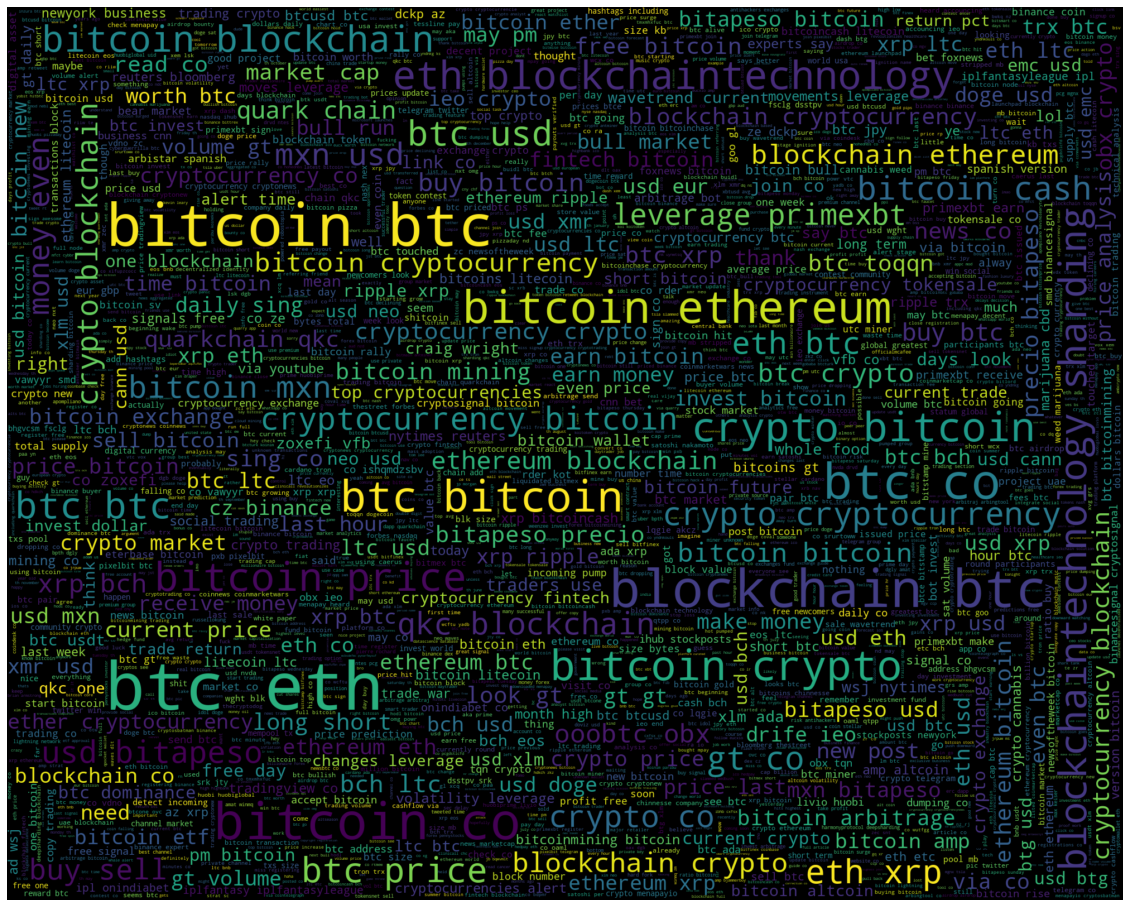

In [ ]:
# all the words wordcloud
!pip install wordcloud
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
allTheWords=" ".join( [twts for twts in df_j['text']])
wordCloud =WordCloud(max_words = 2000,width = 2000, height = 1600 , random_state = 21, max_font_size = 119).generate(allTheWords)
plt.imshow(wordCloud , interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#   subjectivity  and polarity
from textblob import TextBlob

def getPolarity(txt):
    return TextBlob(txt).sentiment.polarity

def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

df_j['polarity'] = df_j['text'].apply(lambda txt: getPolarity(txt))      # new column of sentiment
df_j['Subjectivity'] = df_j['text'].apply(lambda txt: getSubjectivity(txt))  

df_j.sample(10)

,id,user,fullname,url,timestamp,replies,likes,retweets,text,lang,Date_Time,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),polarity,Subjectivity
38949,1126997761126277121,DetroitCrypto,J. Scardina,NaN,2019-05-10 21:49:39+00,0,0,0,current crypto prices btc usd eth usd ltc usd ...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.000000,0.400000
38442,1126994530627084288,BoClient,AE,NaN,2019-05-10 21:36:49+00,0,0,0,poweredbyprozac btc halving de,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.000000,0.000000
737350,1130726519066714112,NaveenBhavikatt,FavouriteBlog.com,NaN,2019-05-21 04:46:24+00,0,0,0,best blockchain programming books beginners up...,en,2019-05-21,BTC,2019-05-21,7961.128743,7984.511103,8092.679154,7811.277222,1.000000,0.300000
634085,1130014122668568577,100krypto,Mot Tram Ngan,NaN,2019-05-19 05:35:36+00,0,0,0,thinkingusd spouting made bucks fiat nxps btc ...,en,2019-05-19,BTC,2019-05-19,8221.259395,7285.421427,8242.357508,7267.210918,0.000000,0.066667
137660,1127513987116142592,2ez28u,Eric,NaN,2019-05-12 08:00:57+00,0,0,0,stepupmarc ct full btc promotors placed btc hy...,en,2019-05-12,BTC,2019-05-12,6992.706661,7241.023653,7577.770675,6758.882084,0.097273,0.330909
270192,1128075330147635200,BlockChainZero,BlockChainZero,NaN,2019-05-13 21:11:31+00,0,0,0,bitcoin btc roars past leaves bloodied u stock...,en,2019-05-13,BTC,2019-05-13,7906.940835,6992.705887,8148.561088,6860.286680,-0.250000,0.250000
390993,1128641303170863104,ChainLinkGod,ChainLinkGod,NaN,2019-05-15 10:40:30+00,0,0,0,yanivf aztek btc hard drive space cheaper thin...,en,2019-05-15,BTC,2019-05-15,8177.453519,7989.127708,8260.953110,7844.980238,0.036111,0.380556
629438,1129981882614132736,Remi_Vladuceanu,Remi Vee 🛡️,NaN,2019-05-19 03:27:29+00,0,7,3,bitcoin headed k years predicts morgan creek f...,en,2019-05-19,BTC,2019-05-19,8221.259395,7285.421427,8242.357508,7267.210918,0.000000,0.000000
521590,1129289004111863809,coinaware,Coinaware,NaN,2019-05-17 05:34:14+00,0,0,0,bitcoin sinks abruptly seven weeks recovery re...,en,2019-05-17,BTC,2019-05-17,7243.650539,7820.076541,7935.974770,6900.829403,-0.112500,0.500000
596853,1129758167041228800,jamesbritton115,James Britton,NaN,2019-05-18 12:38:31+00,0,0,0,free bitcoin money adder online generator co m...,en,2019-05-18,BTC,2019-05-18,7295.649729,7361.257633,7490.794200,7218.260668,0.400000,0.800000


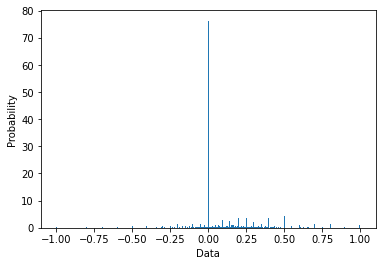

In [ ]:
# HIstogram of polarity 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)
x = np.random.normal(size=1000)

plt.hist(df_j['polarity'], density=True, bins=300)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');


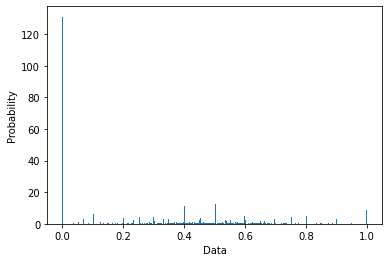

In [ ]:
# HIstogram of subjectivity 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)
x = np.random.normal(size=1000)

plt.hist(df_j['Subjectivity'], density=True, bins=300)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');



In [ ]:
# Bucket the score 

def getAnalysis(Score):
  if Score < 0 :
    return "Negative"
  elif Score >0:
    return "Positive"
  else:
     return "Neutral"

df_j["polarity_bkt "] = df_j["polarity"].apply(getAnalysis)


In [ ]:
# Calculate % change in bitcoin 
df_j["PercentageChange"]= (df_j['Closing Price (USD)']- df_j['24h Open (USD)'] )/df_j['24h Open (USD)'] 

#df1 = df_j.groupby(["Date"]).sum()
#df2 = df_j.groupby(["Date"]).mean()



#df_k = df_j.groupby('Date', as_index=False).agg(Sum1=('Missed','sum'), 
#                                            Sum2= ('Credit','sum'),
#                                            Average=('Grade','mean'))


In [ ]:
# understand the average count of words in reviews
import statistics
count = df_imdb['text'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count[]

35

In [ ]:
# split data into test and train
from numpy.random import RandomState

rng = RandomState()
train_data = df_imdb.sample(frac=0.8, random_state=rng)
test_data = df_imdb.loc[~df_imdb.index.isin(train_data.index)]

In [ ]:
max_features = 2000  # Only consider the top 2k words
maxlen = 160

In [ ]:
# flag as test and train 
train_data['flag'] = 'TRAIN'
test_data['flag'] = 'TEST'

total_docs = pd.concat([train_data,test_data],axis = 0,ignore_index = True)
phrases = total_docs['text'].tolist()

total_docs.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,label,lang,flag
3214,surprisingly interesting meditation nature reg...,1,en,TRAIN
30200,see dick work br br see jane work br br dick j...,0,en,TRAIN
33659,caught movie late one night never knew hit one...,1,en,TEST
30123,like movies make think absolutely one good one...,1,en,TRAIN
33561,stars hayden pantierre br br many movies exact...,0,en,TEST
11002,release peter jackson famed lord rings trilogy...,1,en,TRAIN
19334,affinity towards type filmmaking healthy appre...,0,en,TRAIN
5703,one two best films year well filmed well writt...,1,en,TRAIN
16967,hollywood movie industry laziest one entire wo...,0,en,TRAIN
8074,fortunate enough see movie pre release last ni...,1,en,TRAIN


In [ ]:

def getAnalysis(Score):
  if Score <= -0.5 :
    return "High Negative"
  elif Score >= 0.5:
    return "High Positive"
  else:
     return "Neutral"

total_docs["polarity_bkt "] = total_docs["PercentageChange"].apply(getAnalysis)


In [ ]:
#tockenizing the text
from tensorflow.keras.preprocessing.text import Tokenizer
max_len = 160
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(phrases)
sequences = tok.texts_to_sequences(phrases)
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
x_train, x_val, y_train, y_val = train_test_split(sequences_matrix, total_docs['label'], test_size=0.3, random_state=2)

In [ ]:
#from keras.preprocessing.text import one_hot
#vocab_size = 50000
#encoded_phrases = [one_hot(d, vocab_size) for d in phrases]
#total_docs['Phrase'] = encoded_phrases
#train_data = total_docs[total_docs['flag'] == 'TRAIN']
#test_data = total_docs[total_docs['flag'] == 'TEST']
#x_train = train_data['Phrase']
#y_train = train_data['label']
#x_val = test_data['Phrase']
#y_val = test_data['label']

In [ ]:
#Artitecture of the model
model = Sequential()
inputs = keras.Input(shape=(None,), dtype="int32")


# Embed each integer in a 128-dimensional vector
model.add(inputs)
model.add(Embedding(5000, 32))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.6))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.6))
model.add(LSTM(64))

# Add a classifier
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          24832     
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [ ]:
#compile model
from tensorflow.keras import optimizers
optimizer = optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer = optimizer, 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

history =model.fit(x_train, y_train, 
          batch_size=64, 
          epochs=15, 
          validation_data=(x_val, y_val),
          validation_steps=20,
          callbacks = [early_stop]
          )

Epoch 1/15
438/438 [==============================] - 193s 404ms/step - loss: 0.4916 - accuracy: 0.7441 - val_loss: 0.3152 - val_accuracy: 0.8594
Epoch 2/15
438/438 [==============================] - 171s 391ms/step - loss: 0.3003 - accuracy: 0.8789 - val_loss: 0.3047 - val_accuracy: 0.8672
Epoch 3/15
438/438 [==============================] - 171s 391ms/step - loss: 0.2851 - accuracy: 0.8859 - val_loss: 0.3380 - val_accuracy: 0.8680
Epoch 4/15
438/438 [==============================] - 171s 391ms/step - loss: 0.2694 - accuracy: 0.8935 - val_loss: 0.3187 - val_accuracy: 0.8578


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


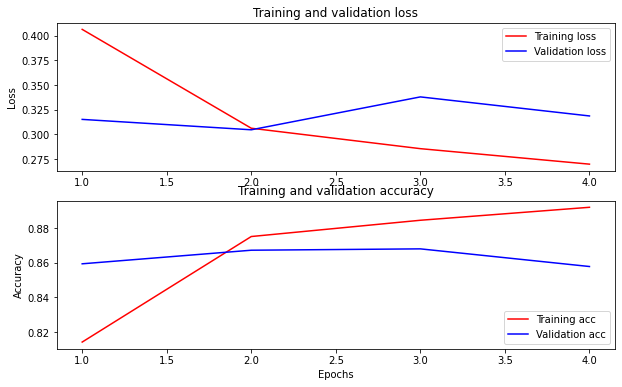

In [ ]:
 #Graph  for 'loss', 'accuracy', 'val_loss', 'val_accuracy'
history_dict = history.history
print(history_dict.keys())


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
#complie model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

history_ = model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=10, 
          validation_data=(x_val, y_val),
          validation_steps=20,
          callbacks = [early_stop])

Epoch 1/10
219/219 [==============================] - 145s 631ms/step - loss: 0.2436 - accuracy: 0.9054 - val_loss: 0.3158 - val_accuracy: 0.8672
Epoch 2/10
219/219 [==============================] - 138s 628ms/step - loss: 0.2112 - accuracy: 0.9179 - val_loss: 0.3209 - val_accuracy: 0.8676
Epoch 3/10
219/219 [==============================] - 138s 629ms/step - loss: 0.2052 - accuracy: 0.9224 - val_loss: 0.3225 - val_accuracy: 0.8645


In [43]:
test_loss, test_acc = model.evaluate(x=x_val, y=y_val)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


375/375 [==============================] - 28s 70ms/step - loss: 0.3135 - accuracy: 0.8675
Test Loss: 0.31352072954177856
Test Accuracy: 0.8675000071525574


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


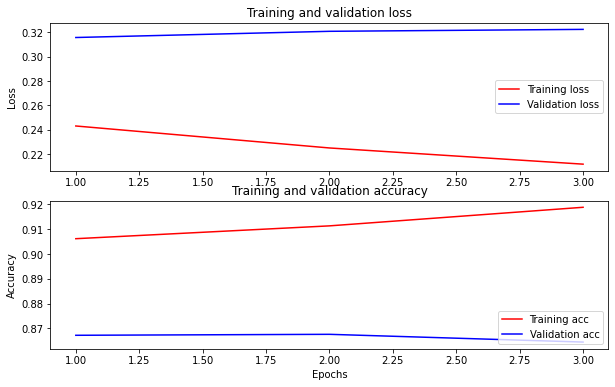

In [ ]:
#Graph  for 'loss', 'accuracy', 'val_loss', 'val_accuracy'
history_dict = history_.history
print(history_dict.keys())


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
model.save("model_imdb_Store")

INFO:tensorflow:Assets written to: model_imdb_Store/assets


INFO:tensorflow:Assets written to: model_imdb_Store/assets


In [ ]:
#using the sentiment created by the model to feed into twitter data to use as one of the features in recommendation 
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(df_j["text"])
sequences = tok.texts_to_sequences(df_j["text"])
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [36]:
# Predict and classify
preds = model.predict(sequences_matrix)

def add_score_predictions(data, reviews_list_idx):

  data['sentiment score'] = 0

  reviews_list_idx = pad_sequences(reviews_list_idx, maxlen=maxLen, padding='post')

  review_preds = model.predict(reviews_list_idx)

  data['sentiment score'] = review_preds

  pred_sentiment = np.array(list(map(lambda x : 'positive' if x > 0.5 else 'negative',review_preds)))

  data['predicted sentiment'] = 0

  data['predicted sentiment'] = pred_sentiment

  return data

In [37]:
# add prediction data as a column in main tweet data 
import pandas as pd
df_j["predictionSentiment"]= pd.DataFrame(preds)

,id,user,fullname,url,timestamp,replies,likes,retweets,text,lang,Date_Time,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),polarity,Subjectivity,PercentageChange,predictionSentiment
0,1132977073402736640,bitcointe,Bitcointe,NaN,2019-05-27 11:49:18+00,0,0,0,cardano digitize currencies eos co ktkqkebls r...,en,2019-05-27,BTC,2019-05-27,8800.346606,8653.151802,8937.246491,8621.572192,0.0,0.00,0.017011,0.297655
1,1132977023893139456,3eyedbran,Bran - 3 Eyed Raven,NaN,2019-05-27 11:49:06+00,0,2,1,another test tweet caught stream bitcoin,en,2019-05-27,BTC,2019-05-27,8800.346606,8653.151802,8937.246491,8621.572192,0.0,0.00,0.017011,0.509277
2,1132977089089556481,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:49:22+00,0,0,0,current crypto prices btc usd eth usd ltc usd ...,en,2019-05-27,BTC,2019-05-27,8800.346606,8653.151802,8937.246491,8621.572192,0.0,0.40,0.017011,0.254879
3,1132977092340191232,mmursaleen72,Muhammad Mursaleen,NaN,2019-05-27 11:49:23+00,0,0,0,spiv nosar baz bitcoin asset amp currency co f...,en,2019-05-27,BTC,2019-05-27,8800.346606,8653.151802,8937.246491,8621.572192,0.0,0.00,0.017011,0.071682
4,1132977101638897665,evilrobotted,evilrobotted,NaN,2019-05-27 11:49:25+00,0,0,0,nwoodfine building real bitcoin sv building br...,en,2019-05-27,BTC,2019-05-27,8800.346606,8653.151802,8937.246491,8621.572192,-0.1,0.35,0.017011,0.388246


In [ ]:
#import numpy as np
#result = model.predict(one_hot("this is happen", vocab_size), steps = 10)
#print(result)
#preds = model.predict(x_val)

#n = np.random.randint(0,9999)

#x_val[n]

#if preds[n] > 0.5:
#  print('predicted sentiment : positive')
#else: 
#  print('precicted sentiment : negative')

#if (y_val[n] == 1):
#  print('correct sentiment : positive')
#else:
#  print('correct sentiment : negative')

In [38]:
df_j_subset = df_j[["Date",  "replies", "likes", "retweets", "polarity", "Subjectivity", "predictionSentiment" ,"PercentageChange" ]]
df_j_subset.head()
#Subseting data for fitting to the model 

df_rec = df_j_subset.groupby('Date', as_index=False).agg(likes=('likes','sum'), 
                                            retweets= ('retweets','sum'), 
                                            replies= ('replies','sum'), 
                                            polarity= ('polarity','mean'), 
                                            Subjectivity= ('Subjectivity','mean'), 
                                            predictionSentiment= ('predictionSentiment','mean'), 
                                            PercentageChangeAverage=('PercentageChange','mean'))

df_rec.head()

,Date,likes,retweets,replies,polarity,Subjectivity,predictionSentiment,PercentageChangeAverage
0,2013-10-02,0,0,2,1.000000,1.000000,0.843876,0.014557
1,2013-10-03,0,0,2,0.500000,0.888889,0.477811,-0.134472
2,2013-10-24,0,0,0,0.000000,0.000000,0.717396,0.065877
3,2013-11-06,1,0,1,0.000000,0.000000,0.693425,0.103250
4,2013-11-17,6,3,2,-0.231818,0.677273,0.703002,0.040648


In [39]:
#Bucketing the movement of the Bicoin in high negative, high positive and neutral
def getAnalysis(Score):
  if Score <= -0.05 :
    return "High Negative"
  elif Score >= 0.05:
    return "High Positive"
  else:
     return "Neutral"


df_rec["bkt"] = df_rec["PercentageChangeAverage"].apply(getAnalysis)
df_rec.head()

,Date,likes,retweets,replies,polarity,Subjectivity,predictionSentiment,PercentageChangeAverage,bkt
0,2013-10-02,0,0,2,1.000000,1.000000,0.843876,0.014557,Neutral
1,2013-10-03,0,0,2,0.500000,0.888889,0.477811,-0.134472,High Negative
2,2013-10-24,0,0,0,0.000000,0.000000,0.717396,0.065877,High Positive
3,2013-11-06,1,0,1,0.000000,0.000000,0.693425,0.103250,High Positive
4,2013-11-17,6,3,2,-0.231818,0.677273,0.703002,0.040648,Neutral


In [40]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:

# split data into X and y
X = df_rec.iloc[:,1:7]
Y = df_rec.iloc[:,8]


In [42]:

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.23%
